In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [18]:
df=pd.read_csv("../data/turorudi.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        1955 non-null   float64
 1    B       1955 non-null   float64
 2    Output  1955 non-null   object 
dtypes: float64(2), object(1)
memory usage: 45.9+ KB


In [19]:
df["diff"] = df['A'] - df[' B']

In [20]:
df

,A,B,Output,diff
0,0.991515,0.659977,no,0.331538
1,0.753599,0.753599,yes,0.000000
2,0.008442,0.008442,yes,0.000000
3,0.269119,0.269119,yes,0.000000
4,0.968195,0.934059,no,0.034136
...,...,...,...,...
1950,0.085772,0.997070,no,-0.911298
1951,0.634791,0.273464,no,0.361327
1952,0.730797,0.730797,yes,0.000000
1953,0.471889,0.100734,no,0.371155


We can easily see that if both columns are equal to each other, then convert to 1, otherwise convert  0. Add a column with this difference and this should help findinf a 100% accuracy.

In [21]:
df.describe(include="all")

,A,B,Output,diff
count,1955.000000,1955.000000,1955,1955.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,no,NaN
freq,NaN,NaN,1015,NaN
mean,0.489796,0.495005,NaN,-0.005209
std,0.288956,0.284561,NaN,0.283316
min,0.000168,0.000310,NaN,-0.981387
25%,0.238053,0.256140,NaN,-0.026890
50%,0.483529,0.494066,NaN,0.000000
75%,0.742044,0.733335,NaN,0.011941


In [22]:
df.iloc[:,2].head(10)

0     no
1    yes
2    yes
3    yes
4     no
5     no
6     no
7    yes
8    yes
9    yes
Name:  Output, dtype: object

In [23]:
X = df.iloc[:,0:2]
y = df.iloc[:,2] 
housing_map = {'yes': 1, 'no': 0}
y = y.map(housing_map)
print(X.shape)
print(y.shape)

(1955, 2)
(1955,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

NameError: name 'train_test_split' is not defined

In [109]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1368, 2)
(1368,)
(587, 2)
(587,)


In [110]:
forest = RandomForestClassifier(n_estimators=10)

In [111]:
forest.fit(x_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=10)

In [112]:
# Accuracy score
from sklearn.metrics import accuracy_score

y_pred = forest.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9505962521294719


In [143]:
# fit AdaBoost with DecisionStump (1R) 
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=50)
clf.fit(x_train,y_train)
y_pred_ada = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_ada))

0.5264054514480409


In [144]:
df.dtypes

A          float64
B          float64
 Output     object
dtype: object

In [153]:
df[" Output"] = df[" Output"].astype('bool')


In [ ]:
df[" Output"].astype('int64')

In [154]:
df.dtypes

A          float64
B          float64
 Output       bool
dtype: object

In [155]:

df.duplicated().sum()

0

In [156]:
import missingno as msno

<AxesSubplot:>

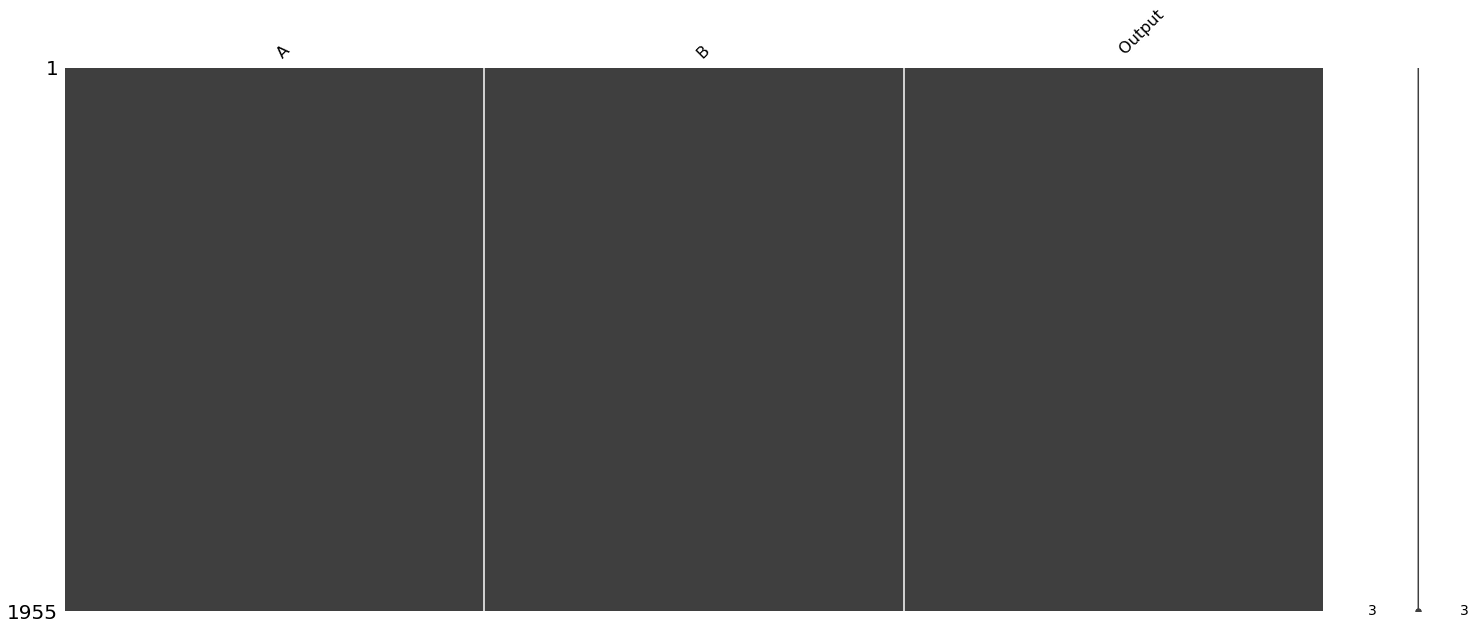

In [150]:
msno.matrix(df)

In [ ]:
df.groupby[" Output"].count()